## Notebook for creating phase diagram of T/B/Q neurons

### Import necessary packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import glob
import re
import io
import os
import sys
import data_prep as dp 
sys.path.append('..')
from brian2 import *
import brian_utils.postproc as bup
import pickle
# import random
# from scipy.interpolate import make_interp_spline
# from sklearn.cluster import *
# from sklearn.mixture import *

### Load in disconnected neuron data from pkl file

In [38]:
with open(f'synblock_pkls/grid_pkls/seed1-control_grid_vars.pkl','rb') as fid1:
    control_data = pickle.load(fid1)
    
with open(f'synblock_pkls/grid_pkls/seed1-damgo_grid_vars.pkl','rb') as fid2:
    damgo_data = pickle.load(fid2)
    
with open(f'synblock_pkls/grid_pkls/seed1-gnap05_grid_vars.pkl','rb') as fid3:
    gnap_data = pickle.load(fid3)
    
with open(f'synblock_pkls/grid_pkls/seed1-damgo_gnap05_grid_vars.pkl','rb') as fid4:
    damgo_gnap_data = pickle.load(fid4)

In [39]:
control_state = control_data['statemonitor']
control_neurons = control_data['neurongroup']

damgo_state = damgo_data['statemonitor']
damgo_neurons = damgo_data['neurongroup']

gnap_state = gnap_data['statemonitor']
gnap_neurons = gnap_data['neurongroup']

damgo_gnap_state = damgo_gnap_data['statemonitor']
damgo_gnap_neurons = damgo_gnap_data['neurongroup']

### Plot single neuron

In [4]:
f = plt.figure(figsize=(10,6))
f.tight_layout()
g = f.add_gridspec(2,1)

ax0 = f.add_subplot(g[0,0])
ax0 = plt.plot(control_state['t'], control_state['v'][:,1])
#ax0 = plt.xlim(100,105)
#ax0 = plt.ylim(-0.055,-0.052)
ax0 = plt.ylabel(r'$V$     ', rotation=0)

ax1 = f.add_subplot(g[1,0])
ax1 = plt.plot(control_state['t'], control_state['h'][:,1], color = 'r')
#ax1 = plt.xlim(100,105)
#ax1 = plt.ylim(0.43,0.73)
ax1 = plt.xlabel('Time (s)', rotation=0)
ax1 = plt.ylabel(r'$h$     ', rotation=0)

#plt.savefig('quiescent_example.png')

### Plot average h and V value for each neuron

In [5]:
control_v_means = control_state['v'].mean(axis=0)
control_h_means = control_state['h'].mean(axis=0)

damgo_v_means = damgo_state['v'].mean(axis=0)
damgo_h_means = damgo_state['h'].mean(axis=0)

f = plt.figure(figsize=(10,6))
f.tight_layout()
g = f.add_gridspec(1,2)

ax0 = f.add_subplot(g[0,0])
ax0 = plt.scatter(control_v_means, control_h_means, c = 'b')
ax0 = plt.xlabel(r'$\bar V$')
ax0 = plt.ylabel(r'$\bar h$        ', rotation=0)
ax0 = plt.title(r'Average $(V,h)$ for each neuron')

ax0 = f.add_subplot(g[0,1])
ax0 = plt.scatter(damgo_v_means, damgo_h_means, c = 'r')
ax0 = plt.xlabel(r'$\bar V$')
ax0 = plt.ylabel(r'$\bar h$        ', rotation=0)
ax0 = plt.title(r'Average $(V,h)$ for each neuron')
#plt.savefig('rand_g_avg_v_h.png')

### Cluster T/Q/B neurons based on # of peaks within an ISI

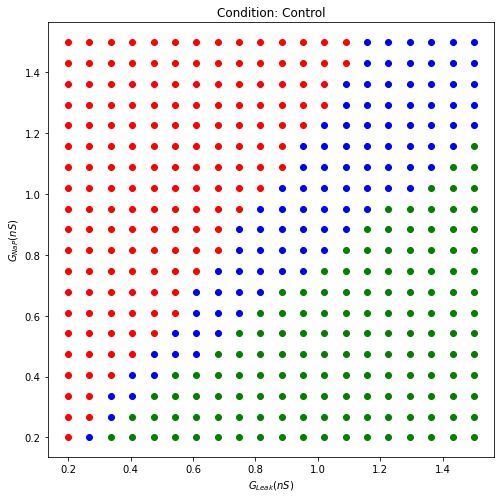

In [40]:
ts = control_data['spikemonitor']['t']
spike_idx = control_data['spikemonitor']['i']

train = bup.create_train(ts,spike_idx)
control_cell_int,control_cell_class = bup.find_bursters_pk_ISI(train,400,)

plt.figure(figsize=(8,8))
for neuron in range(len(control_cell_int)):
    if control_cell_int[neuron] == 0:
        pt0 = plt.scatter(control_neurons['g_l'][neuron]/nS, control_neurons['g_nap'][neuron]/nS, c='b')
    
    if control_cell_int[neuron] == 1:
        pt1 = plt.scatter(control_neurons['g_l'][neuron]/nS, control_neurons['g_nap'][neuron]/nS, c='r')

    if control_cell_int[neuron] == 2:
        pt2 = plt.scatter(control_neurons['g_l'][neuron]/nS, control_neurons['g_nap'][neuron]/nS, c='g')

#plt.legend([pt0,pt1,pt2],['Bursting','Tonic','Quiescent'])
plt.xlabel(r'$G_{Leak} (nS)$')
plt.ylabel(r'$G_{NaP} (nS)$')
plt.title('Condition: Control')
plt.savefig('phase_diagrams/control_grid_phase_diagram.png')

In [ ]:
# spot check
plt.plot(control_state['t'], control_state['v'][:,1])

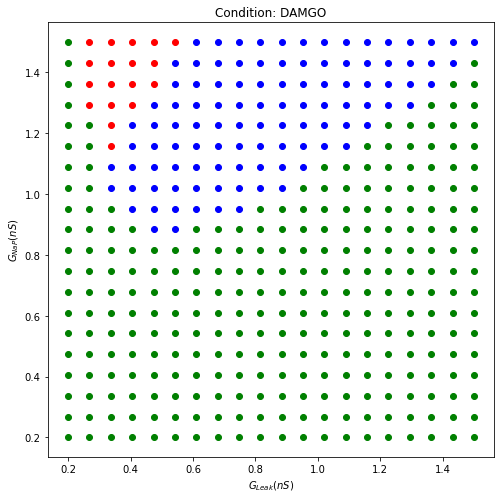

In [41]:
ts = damgo_data['spikemonitor']['t']
spike_idx = damgo_data['spikemonitor']['i']

train = bup.create_train(ts,spike_idx)
damgo_cell_int, damgo_cell_class = bup.find_bursters_pk_ISI(train,400,)

plt.figure(figsize=(8,8))
for neuron in range(len(damgo_cell_int)):
    if damgo_cell_int[neuron] == 0:
        pt0 = plt.scatter(damgo_neurons['g_l'][neuron]/nS, damgo_neurons['g_nap'][neuron]/nS, c='b')
    
    if damgo_cell_int[neuron] == 1:
        pt1 = plt.scatter(damgo_neurons['g_l'][neuron]/nS, damgo_neurons['g_nap'][neuron]/nS, c='r')

    if damgo_cell_int[neuron] == 2:
        pt2 = plt.scatter(damgo_neurons['g_l'][neuron]/nS, damgo_neurons['g_nap'][neuron]/nS, c='g')
        
#plt.legend([pt0,pt1,pt2],['Bursting','Tonic','Quiescent'])
plt.xlabel(r'$G_{Leak} (nS)$')
plt.ylabel(r'$G_{NaP} (nS)$')
plt.title('Condition: DAMGO')
plt.savefig('phase_diagrams/damgo_grid_phase_diagram.png')

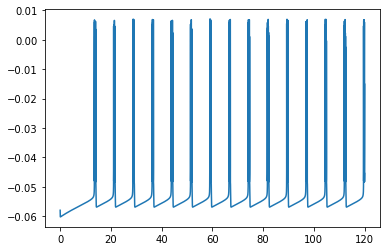

In [21]:
# spot check
plt.plot(damgo_state['t'], damgo_state['v'][:,399])

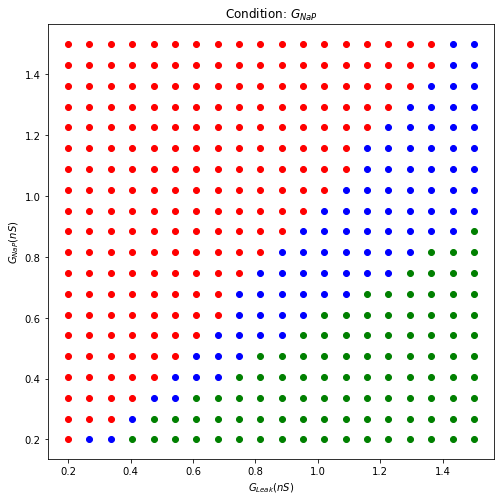

In [42]:
ts = gnap_data['spikemonitor']['t']
spike_idx = gnap_data['spikemonitor']['i']

train = bup.create_train(ts,spike_idx)
gnap_cell_int, gnap_cell_class = bup.find_bursters_pk_ISI(train,400,)

plt.figure(figsize=(8,8))
for neuron in range(len(gnap_cell_int)):
    if gnap_cell_int[neuron] == 0:
        pt0 = plt.scatter(gnap_neurons['g_l'][neuron]/nS, gnap_neurons['g_nap'][neuron]/nS, c='b')
    
    if gnap_cell_int[neuron] == 1:
        pt1 = plt.scatter(gnap_neurons['g_l'][neuron]/nS, gnap_neurons['g_nap'][neuron]/nS, c='r')

    if gnap_cell_int[neuron] == 2:
        pt2 = plt.scatter(gnap_neurons['g_l'][neuron]/nS, gnap_neurons['g_nap'][neuron]/nS, c='g')
        
#plt.legend([pt0,pt1,pt2],['Bursting','Tonic','Quiescent'])
plt.xlabel(r'$G_{Leak} (nS)$')
plt.ylabel(r'$G_{NaP} (nS)$')
plt.title(r'Condition: $G_{NaP}$')
plt.savefig('phase_diagrams/gnap_grid_phase_diagram.png')

In [11]:
# spot check
plt.plot(gnap_state['t'], gnap_state['v'][:,398])
plt.xlim(60,70)

(60.0, 70.0)

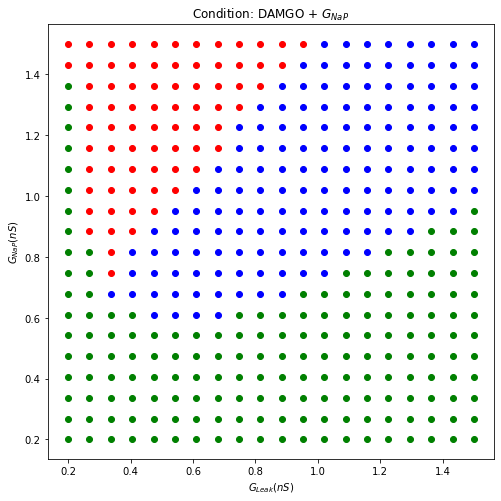

In [43]:
ts = damgo_gnap_data['spikemonitor']['t']
spike_idx = damgo_gnap_data['spikemonitor']['i']

train = bup.create_train(ts,spike_idx)
damgo_gnap_cell_int, damgo_gnap_cell_class = bup.find_bursters_pk_ISI(train,400,)

plt.figure(figsize=(8,8))
for neuron in range(len(damgo_gnap_cell_int)):
    if damgo_gnap_cell_int[neuron] == 0:
        pt0 = plt.scatter(damgo_gnap_neurons['g_l'][neuron]/nS, damgo_gnap_neurons['g_nap'][neuron]/nS, c='b')
    
    if damgo_gnap_cell_int[neuron] == 1:
        pt1 = plt.scatter(damgo_gnap_neurons['g_l'][neuron]/nS, damgo_gnap_neurons['g_nap'][neuron]/nS, c='r')

    if damgo_gnap_cell_int[neuron] == 2:
        pt2 = plt.scatter(damgo_gnap_neurons['g_l'][neuron]/nS, damgo_gnap_neurons['g_nap'][neuron]/nS, c='g')
        
#plt.legend([pt0,pt1,pt2],['Bursting','Tonic','Quiescent'])
plt.xlabel(r'$G_{Leak} (nS)$')
plt.ylabel(r'$G_{NaP} (nS)$')
plt.title(r'Condition: DAMGO + $G_{NaP}$')
plt.savefig('phase_diagrams/gnap_damgo_grid_phase_diagram.png')

In [13]:
# spot check
plt.plot(damgo_gnap_state['t'], damgo_gnap_state['v'][:,392])

### Phase diagram with distinct populations

In [3]:
with open(f'synblock_pkls/clouds_pkls/seed1-control_pop_vars.pkl','rb') as fid1:
    control_data = pickle.load(fid1)
    
with open(f'synblock_pkls/clouds_pkls/seed1-damgo_pop_vars.pkl','rb') as fid2:
    damgo_data = pickle.load(fid2)
    
with open(f'synblock_pkls/clouds_pkls/seed1-gnap05_pop_vars.pkl','rb') as fid3:
    gnap_data = pickle.load(fid3)
    
with open(f'synblock_pkls/clouds_pkls/seed1-damgo_gnap05_pop_vars.pkl','rb') as fid4:
    damgo_gnap_data = pickle.load(fid4)

In [4]:
control_state = control_data['statemonitor']
control_neurons = control_data['neurongroup']

damgo_state = damgo_data['statemonitor']
damgo_neurons = damgo_data['neurongroup']

gnap_state = gnap_data['statemonitor']
gnap_neurons = gnap_data['neurongroup']

damgo_gnap_state = damgo_gnap_data['statemonitor']
damgo_gnap_neurons = damgo_gnap_data['neurongroup']

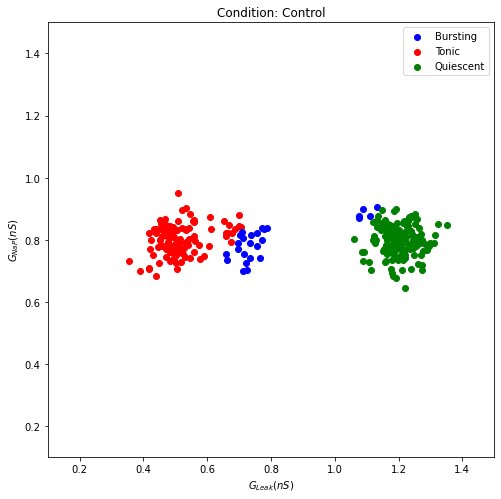

In [5]:
ts = control_data['spikemonitor']['t']
spike_idx = control_data['spikemonitor']['i']

train = bup.create_train(ts,spike_idx)
control_cell_int,control_cell_class = bup.find_bursters_pk_ISI(train,300,)

plt.figure(figsize=(8,8))
for neuron in range(len(control_cell_int)):
    if control_cell_int[neuron] == 0:
        pt0 = plt.scatter(control_neurons['g_l'][neuron]/nS, control_neurons['g_nap'][neuron]/nS, c='b')
    
    if control_cell_int[neuron] == 1:
        pt1 = plt.scatter(control_neurons['g_l'][neuron]/nS, control_neurons['g_nap'][neuron]/nS, c='r')

    if control_cell_int[neuron] == 2:
        pt2 = plt.scatter(control_neurons['g_l'][neuron]/nS, control_neurons['g_nap'][neuron]/nS, c='g')
    
plt.xlim(0.1,1.5)
plt.ylim(0.1,1.5)
plt.xlabel(r'$G_{Leak} (nS)$')
plt.ylabel(r'$G_{NaP} (nS)$')
plt.title('Condition: Control')
plt.legend([pt0,pt1,pt2],['Bursting','Tonic','Quiescent'])
plt.savefig('phase_diagrams/control_pop_phase_diagram.png')

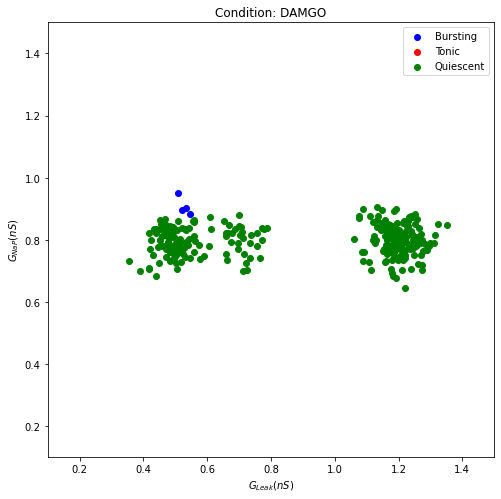

In [6]:
ts = damgo_data['spikemonitor']['t']
spike_idx = damgo_data['spikemonitor']['i']

train = bup.create_train(ts,spike_idx)
damgo_cell_int,damgo_cell_class = bup.find_bursters_pk_ISI(train,300,)

plt.figure(figsize=(8,8))
for neuron in range(len(damgo_cell_int)):
    if damgo_cell_int[neuron] == 0:
        pt0 = plt.scatter(damgo_neurons['g_l'][neuron]/nS, damgo_neurons['g_nap'][neuron]/nS, c='b')
    
    if damgo_cell_int[neuron] == 1:
        pt1 = plt.scatter(damgo_neurons['g_l'][neuron]/nS, damgo_neurons['g_nap'][neuron]/nS, c='r')

    if damgo_cell_int[neuron] == 2:
        pt2 = plt.scatter(damgo_neurons['g_l'][neuron]/nS, damgo_neurons['g_nap'][neuron]/nS, c='g')

plt.xlim(0.1,1.5)
plt.ylim(0.1,1.5)
plt.xlabel(r'$G_{Leak} (nS)$')
plt.ylabel(r'$G_{NaP} (nS)$')
plt.title('Condition: DAMGO')
plt.legend([pt0,pt1,pt2],['Bursting','Tonic','Quiescent'])
plt.savefig('phase_diagrams/damgo_pop_phase_diagram.png')

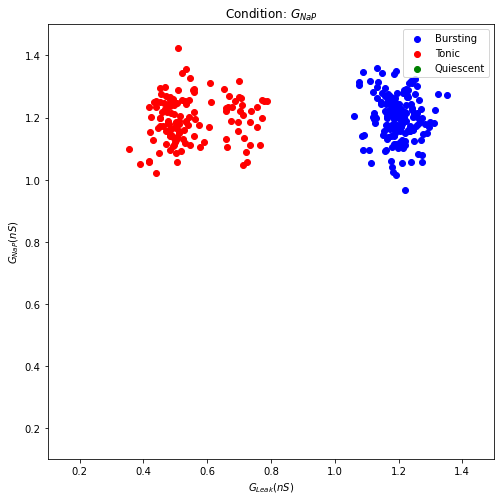

In [7]:
ts = gnap_data['spikemonitor']['t']
spike_idx = gnap_data['spikemonitor']['i']

train = bup.create_train(ts,spike_idx)
gnap_cell_int,gnap_cell_class = bup.find_bursters_pk_ISI(train,300,)

plt.figure(figsize=(8,8))
for neuron in range(len(gnap_cell_int)):
    if gnap_cell_int[neuron] == 0:
        pt0 = plt.scatter(gnap_neurons['g_l'][neuron]/nS, (gnap_neurons['g_nap'][neuron]*1.5)/nS, c='b')
    
    if gnap_cell_int[neuron] == 1:
        pt1 = plt.scatter(gnap_neurons['g_l'][neuron]/nS, (gnap_neurons['g_nap'][neuron]*1.5)/nS, c='r')

    if gnap_cell_int[neuron] == 2:
        pt2 = plt.scatter(gnap_neurons['g_l'][neuron]/nS, (gnap_neurons['g_nap'][neuron]*1.5)/nS, c='g')

plt.xlim(0.1,1.5)
plt.ylim(0.1,1.5)
plt.xlabel(r'$G_{Leak} (nS)$')
plt.ylabel(r'$G_{NaP} (nS)$')
plt.title(r'Condition: $G_{NaP}$')
plt.legend([pt0,pt1,pt2],['Bursting','Tonic','Quiescent'])
plt.savefig('phase_diagrams/gnap_pop_phase_diagram.png')

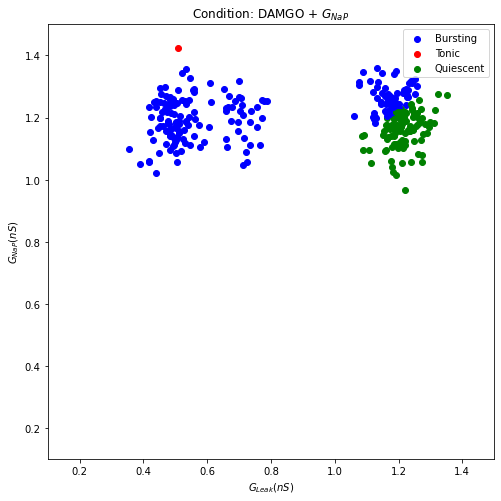

In [8]:
ts = damgo_gnap_data['spikemonitor']['t']
spike_idx = damgo_gnap_data['spikemonitor']['i']

train = bup.create_train(ts,spike_idx)
damgo_gnap_cell_int,damgo_gnap_cell_class = bup.find_bursters_pk_ISI(train,300,)

plt.figure(figsize=(8,8))
for neuron in range(len(damgo_gnap_cell_int)):
    if damgo_gnap_cell_int[neuron] == 0:
        pt0 = plt.scatter(damgo_gnap_neurons['g_l'][neuron]/nS, (damgo_gnap_neurons['g_nap'][neuron]*1.5)/nS, c='b')
    
    if damgo_gnap_cell_int[neuron] == 1:
        pt1 = plt.scatter(damgo_gnap_neurons['g_l'][neuron]/nS, (damgo_gnap_neurons['g_nap'][neuron]*1.5)/nS, c='r')

    if damgo_gnap_cell_int[neuron] == 2:
        pt2 = plt.scatter(damgo_gnap_neurons['g_l'][neuron]/nS, (damgo_gnap_neurons['g_nap'][neuron]*1.5)/nS, c='g')
    
plt.xlim(0.1,1.5)
plt.ylim(0.1,1.5)
plt.xlabel(r'$G_{Leak} (nS)$')
plt.ylabel(r'$G_{NaP} (nS)$')
plt.title(r'Condition: DAMGO + $G_{NaP}$')
plt.legend([pt0,pt1,pt2],['Bursting','Tonic','Quiescent'])
plt.savefig('phase_diagrams/damgo_gnap_pop_phase_diagram.png')

### Bar charts of tonic vs bursting vs quiescent

<Figure size 720x720 with 0 Axes>

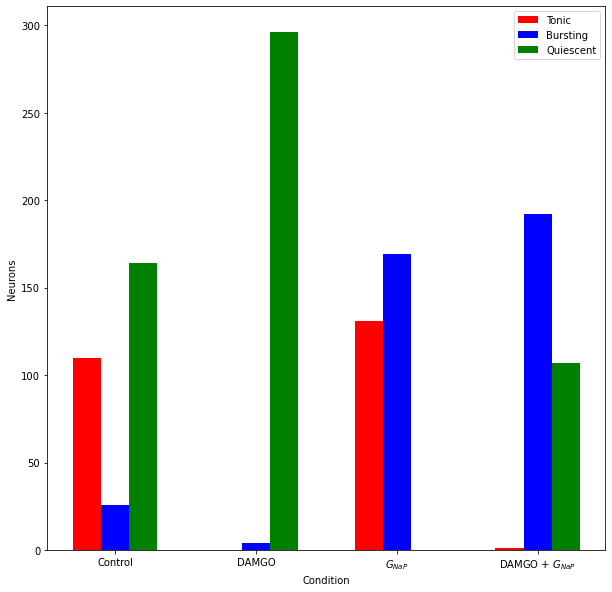

In [13]:
num_c_bursts = len(np.where(control_cell_int == 0)[0])
num_d_bursts = len(np.where(damgo_cell_int == 0)[0])
num_g_bursts = len(np.where(gnap_cell_int == 0)[0])
num_dg_bursts = len(np.where(damgo_gnap_cell_int == 0)[0])
total_bursts = np.array([num_c_bursts, num_d_bursts, num_g_bursts, num_dg_bursts])

num_c_tonic = len(np.where(control_cell_int == 1)[0])
num_d_tonic = len(np.where(damgo_cell_int == 1)[0])
num_g_tonic = len(np.where(gnap_cell_int == 1)[0])
num_dg_tonic = len(np.where(damgo_gnap_cell_int == 1)[0])
total_tonic = np.array([num_c_tonic, num_d_tonic, num_g_tonic, num_dg_tonic])

num_c_quiescent = len(np.where(control_cell_int == 2)[0])
num_d_quiescent = len(np.where(damgo_cell_int == 2)[0])
num_g_quiescent = len(np.where(gnap_cell_int == 2)[0])
num_dg_quiescent = len(np.where(damgo_gnap_cell_int == 2)[0])
total_quiescent = np.array([num_c_quiescent, num_d_quiescent, num_g_quiescent, num_dg_quiescent])

data = [total_tonic, total_bursts, total_quiescent]
X = np.arange(4)
f = plt.figure(figsize=(10,10))
width = 0.2

f, ax = plt.subplots(figsize=(10,10))
tonic = ax.bar(X-width, data[0], width, label = 'Tonic', color = 'r')
bursters = ax.bar(X, data[1], width, label = 'Bursting', color = 'b')
quiescent = ax.bar(X+width, data[2], width, label = 'Quiescent', color = 'g')

ax.set_xticks(X)
ax.set_xticklabels(['Control','DAMGO',r'$G_{NaP}$',r'DAMGO + $G_{NaP}$'])
ax.set_xlabel('Condition')
ax.set_ylabel('Neurons')
plt.legend()


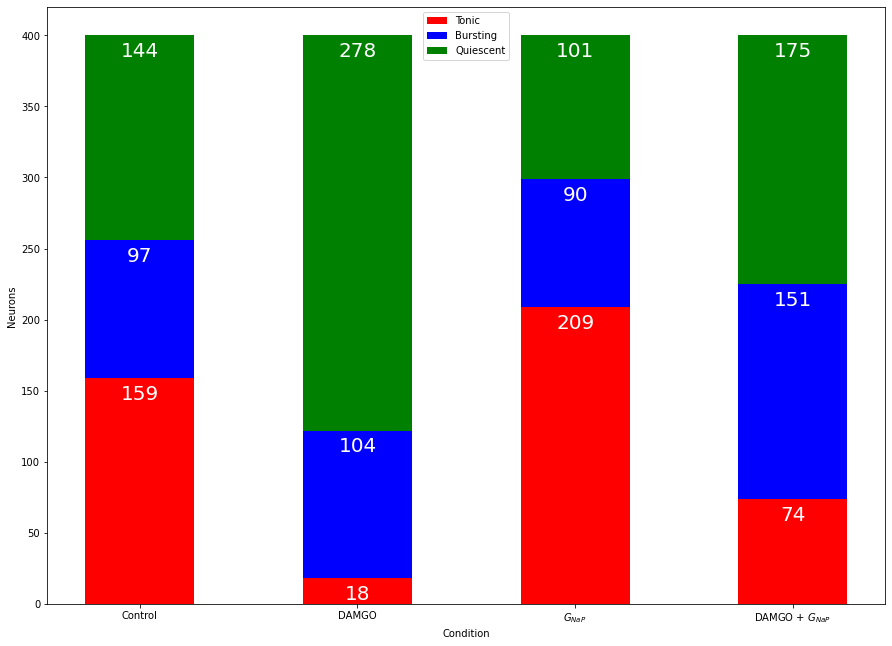

In [139]:
#f = plt.figure(figsize=(14,10))
width = 0.5
conditions = ['Control','DAMGO',r'$G_{NaP}$',r'DAMGO + $G_{NaP}$']

f, ax = plt.subplots(figsize=(14,10))
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, left = 0.15)
tonic = ax.bar(conditions, total_tonic, color = 'r', width = width)
bursters = ax.bar(conditions, total_bursts, bottom = total_tonic, color = 'b', width = width)
quiescent = ax.bar(conditions, total_quiescent, bottom = total_tonic + total_bursts, color = 'g', width = width)

y_offset = -15
for bar in ax.patches:
    if bar.get_height() > 4:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + bar.get_y() + y_offset,
            bar.get_height(),
            ha = 'center',
            color = 'w',
            size = 20
        )

#ax.set_xticklabels(['Control','DAMGO',r'$G_{NaP}$',r'DAMGO + $G_{NaP}$'])
ax.set_xlabel('Condition')
ax.set_ylabel('Neurons')

ax.legend(['Tonic','Bursting','Quiescent'], loc = 'upper center')
